In [51]:
# Regression problem XGBoost
shhh <- suppressPackageStartupMessages
shhh(library(AER))
shhh(library(car))
shhh(library(dplyr))
shhh(library(xgboost))
shhh(library(tidyquant))
shhh(library(Metrics))

data("HousePrices")

data <- HousePrices %>%
  mutate_if(is.factor, as.numeric)

head(data)

price,lotsize,bedrooms,bathrooms,stories,driveway,recreation,fullbase,gasheat,aircon,garage,prefer
42000,5850,3,1,2,2,1,2,1,1,1,1
38500,4000,2,1,1,2,1,1,1,1,0,1
49500,3060,3,1,1,2,1,1,1,1,0,1
60500,6650,3,1,2,2,2,1,1,1,0,1
61000,6360,2,1,1,2,1,1,1,1,0,1
66000,4160,3,1,1,2,2,2,1,2,0,1


In [52]:
####################################################################################
# For this example split between train and test
smp_size <- floor(nrow(data) * 0.80)

train_ind <- sample(seq_len(nrow(data)), size = smp_size)

train <- data[train_ind, ]
test <- data[-train_ind, ]

paste("Train Dimensions"); dim(train)
paste("Test Dimensions"); dim(test)
####################################################################################

[1] "Train Dimensions"

[1] 436  12

[1] "Test Dimensions"

[1] 110  12

In [53]:
####################################################################################
predictHouseSales <- function(train_data, test_data){
  x_train <- subset(train_data, select = c(-price))
  y_train <- subset(train_data, select = c(price)) %>% pull(price)
  
  x_test <- subset(test_data, select = c(-price))
  y_test <- subset(test_data, select = c(price)) %>% pull(price)
  
  dtrain <- xgb.DMatrix(data = as.matrix(x_train), label = y_train, missing = "NaN")
  dtest <- xgb.DMatrix(data = as.matrix(x_test), missing = "NaN")
  
  params <- list(
    "eta" = 0.1, 
    "max_depth" = 5, 
    "objective" = "reg:linear",
    "eval_metric"= "rmse"
    )
  
  xgb.model <- xgb.train(params, dtrain, nrounds = 100)
  
  return(predict(xgb.model, newdata = dtest))
  
}

myPredictions <- predictHouseSales(train, test)
####################################################################################

In [54]:
myPredictions %>%
  data.frame() %>%
  setNames(c("myPreds")) %>%
  mutate(myPreds = round(myPreds, 0)) %>%
  bind_cols(test) %>%
  select(myPreds, price) %>%
  summarise(rmse(myPreds, price))

"rmse(myPreds, price)"
14587.14


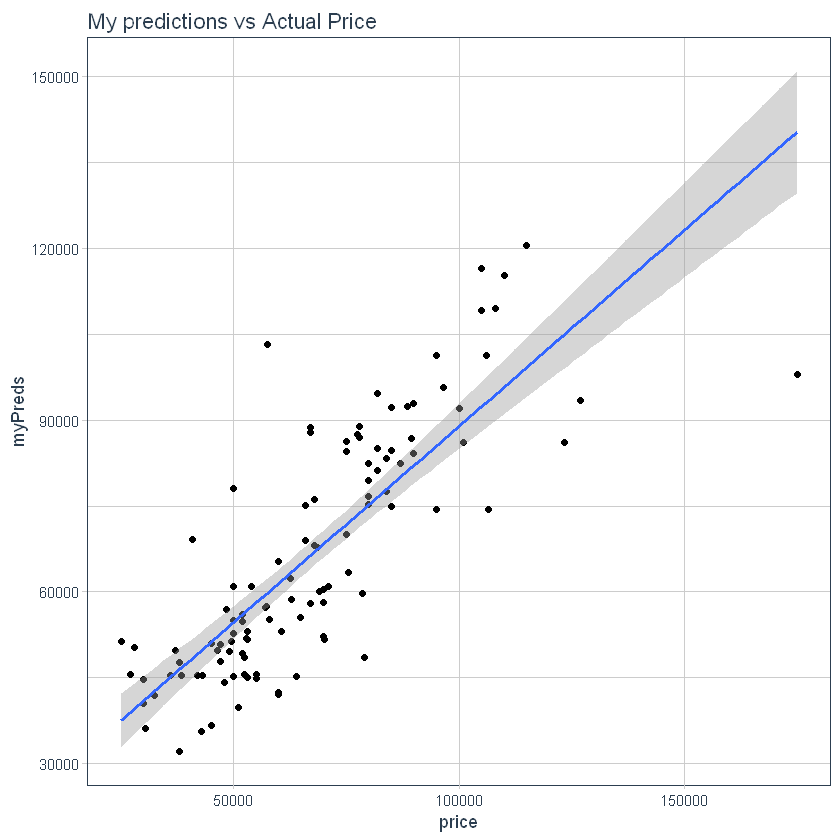

In [55]:
myPredictions %>%
  data.frame() %>%
  setNames(c("myPreds")) %>%
  mutate(myPreds = round(myPreds, 0)) %>%
  bind_cols(test) %>%
  select(myPreds, price) %>%
  ggplot(aes(x = price, y = myPreds)) +
  geom_point() +
  geom_smooth(method = 'lm') +
  ggtitle("My predictions vs Actual Price") +
  theme_tq()
